In [ ]:
from google.colab import drive
import zipfile
import os

# Mount Google Drive
drive.mount('/content/drive')

# Define the paths
zip_file_path = '/content/drive/My Drive/archive (4).zip'  # Adjust the path to your file location
destination_folder = '/content/flower_dataset'

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(destination_folder)

print(f"Extracted files to: {destination_folder}")


Mounted at /content/drive
Extracted files to: /content/flower_dataset


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets,transforms
import torchvision

In [ ]:
train_dir='/content/flower_dataset/train'
test_dir='/content/flower_dataset/test'
valid_dir='/content/flower_dataset/valid'

In [ ]:
train_transform=transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
test_transform=transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])


In [ ]:
train_dataset=datasets.ImageFolder(train_dir,transform=train_transform)
test_dataset=datasets.ImageFolder(test_dir,transform=test_transform)
valid_dataset=datasets.ImageFolder(valid_dir,transform=test_transform)

In [ ]:
train_loader=DataLoader(train_dataset,batch_size=32,shuffle=True)
test_loader=DataLoader(test_dataset,batch_size=32,shuffle=False)
valid_loader=DataLoader(valid_dataset,batch_size=32,shuffle=False)

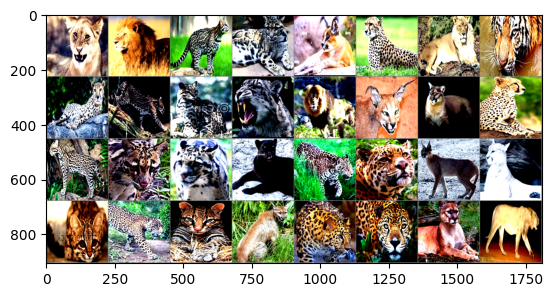

LIONS LIONS OCELOT CLOUDED LEOPARD CARACAL CHEETAH LIONS TIGER CHEETAH OCELOT OCELOT SNOW LEOPARD LIONS CARACAL PUMA  CHEETAH OCELOT CLOUDED LEOPARD CLOUDED LEOPARD JAGUAR JAGUAR JAGUAR CARACAL PUMA  OCELOT JAGUAR OCELOT PUMA  AFRICAN LEOPARD JAGUAR PUMA  LIONS


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
def imshow(img):
  img=img/2+0.5
  npimg=img.numpy()
  plt.imshow(np.transpose(npimg,(1,2,0)))
  plt.show()

dataiter=iter(train_loader)
images,labels=next(dataiter)
imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{train_dataset.classes[labels[j]]:5}' for j in range(32)))


In [ ]:
class_names = train_dataset.classes
num_classes = len(class_names)

In [ ]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
class CustomCNN(nn.Module):
  def __init__(self):
    super(CustomCNN,self).__init__()
    self.conv1=nn.Conv2d(3,32,kernel_size=3,padding=1)
    self.conv2=nn.Conv2d(32,64,kernel_size=3,padding=1)
    self.conv3=nn.Conv2d(64,128,kernel_size=3,padding=1)
    self.pool=nn.MaxPool2d(2,2)
    self.fc1=nn.Linear(128*28*28,512)
    self.fc2=nn.Linear(512,128)
    self.fc3=nn.Linear(128,num_classes)

  def forward(self,x):
    x=self.pool(torch.relu(self.conv1(x)))
    x=self.pool(torch.relu(self.conv2(x)))
    x=self.pool(torch.relu(self.conv3(x)))
    x=x.view(-1,128*28*28)
    x=torch.relu(self.fc1(x))
    x=torch.relu(self.fc2(x))
    x=self.fc3(x)

    return x

model=CustomCNN().to(device)


In [ ]:
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(),lr=0.001)

In [ ]:
num_epochs=10
for epoch in range(num_epochs):
  model.train()
  running_loss=0.0
  total=0
  correct=0
  for images,labels in train_loader:
    images=images.to(device)
    labels=labels.to(device)
    optimizer.zero_grad()
    outputs=model(images)
    loss=criterion(outputs,labels)
    loss.backward()
    optimizer.step()
    running_loss+=loss.item()
    _,predicted=torch.max(outputs.data,1)
    total+=labels.size(0)
    correct+=(predicted==labels).sum().item()

  train_loss=running_loss/len(train_loader)
  train_loader_accuracy=100*correct/total
  print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss:.4f}, Accuracy: {train_loader_accuracy:.2f}%')

  model.eval()
  val_total=0
  val_correct=0
  with torch.no_grad():
    for images,labels in valid_loader:
       images=images.to(device)
       labels=labels.to(device)
       outputs=model(images)
       _,predicted=torch.max(outputs,1)
       val_total+=labels.size(0)
       val_correct+=(predicted==labels).sum().item()
    val_accuracy=100*val_correct/val_total
    print(f'Validation Accuracy: {val_accuracy:.2f}%')

Epoch [1/10], Loss: 0.0000, Accuracy: 100.00%
Validation Accuracy: 60.00%
Epoch [2/10], Loss: 0.0000, Accuracy: 100.00%
Validation Accuracy: 60.00%
Epoch [3/10], Loss: 0.0000, Accuracy: 100.00%
Validation Accuracy: 60.00%
Epoch [4/10], Loss: 0.0000, Accuracy: 100.00%
Validation Accuracy: 60.00%
Epoch [5/10], Loss: 0.0000, Accuracy: 100.00%
Validation Accuracy: 60.00%
Epoch [6/10], Loss: 0.0000, Accuracy: 100.00%
Validation Accuracy: 60.00%
Epoch [7/10], Loss: 0.0000, Accuracy: 100.00%
Validation Accuracy: 60.00%
Epoch [8/10], Loss: 0.0000, Accuracy: 100.00%
Validation Accuracy: 62.00%
Epoch [9/10], Loss: 0.0000, Accuracy: 100.00%
Validation Accuracy: 62.00%
Epoch [10/10], Loss: 0.0000, Accuracy: 100.00%
Validation Accuracy: 62.00%


In [ ]:
model.eval()
test_running_loss=0.0
test_total=0
test_correct=0
with torch.no_grad():
  for images,labels in test_loader:
    images=images.to(device)
    labels=labels.to(device)
    outputs=model(images)
    loss=criterion(outputs,labels)
    test_running_loss+=loss.item()
    _,predicted=torch.max(outputs,1)
    test_total+=labels.size(0)
    test_correct+=(predicted==labels).sum().item()

test_loss=test_running_loss/len(test_loader)
test_accuracy=100*test_correct/test_total
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')




Test Loss: 3.0004, Test Accuracy: 60.00%
